# CNN 

based on Aaron's. added dropout and data augmentation. also saved a fraction of the data for validaiton, to be used for model selection & tracking undertraining/overtraining.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

In [2]:
import tensorflow
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3

Num GPUs Available:  1


/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/.virtualenvs/p

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def train_batch(batch_no):
    cifar10_dir = "./cifar-10-batches-py/"
    batch_file = cifar10_dir+"data_batch_"+str(batch_no)
    with open(batch_file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
        
    x, y = batch[b'data'], batch[b'labels']
    x = x.reshape((np.shape(x)[0], 3, 32, 32)).transpose(0, 2, 3, 1).astype('float32')  # reshape the images
    return x, y

def test_batch():
    batch_file = "./cifar-10-batches-py/test_batch"
    with open(batch_file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
        
    x, y = batch[b'data'], batch[b'labels']
    x = x.reshape((np.shape(x)[0], 3, 32, 32)).transpose(0, 2, 3, 1).astype('float32')  # reshape the images
    return x, y


x, y = [], []
for i in range(1, 6):
    x.append(train_batch(i)[0])
    y.append(train_batch(i)[1])
x, y = np.vstack((x)), np.hstack((y))

 
x_test, y_test = test_batch()  # test set

# split training/validation
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                  test_size=0.2,
                                                  random_state=123,
                                                  shuffle=True)

preprocessing

In [5]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [6]:
# features 
norm = np.max(x_train)
x_train = x_train/norm
x_test = x_test/norm
x_val = x_val/norm

# classes
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

data augmentation

In [7]:
from keras.preprocessing.image import ImageDataGenerator

I used the ImageDataGenerator class from keras to transform the training images by generating new images with rotation, crops, zooms, flipeed, etc. 

In [8]:
datagen = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             horizontal_flip=True)
datagen.fit(x_train)

training the model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, SpatialDropout2D

In [10]:
batch_size = 128
epochs = 30

In [12]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(datagen.flow(x_train, y_train,
                              batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
313/313 [==============================] - 11s 36ms/step - loss: 1.9372 - acc: 0.2829 - val_loss: 1.7092 - val_acc: 0.3775
Epoch 2/30
313/313 [==============================] - 9s 30ms/step - loss: 1.7049 - acc: 0.3821 - val_loss: 1.5869 - val_acc: 0.4308
Epoch 3/30
313/313 [==============================] - 10s 30ms/step - loss: 1.5952 - acc: 0.4255 - val_loss: 1.4766 - val_acc: 0.4722
Epoch 4/30
313/313 [==============================] - 9s 30ms/step - loss: 1.5319 - acc: 0.4510 - val_loss: 1.4241 - val_acc: 0.4957
Epoch 5/30
313/313 [==============================] - 10s 30ms/step - loss: 1.4669 - acc: 0.4735 - val_loss: 1.3885 - val_acc: 0.5078
Epoch 6/30
313/313 [==============================] - 9s 30ms/step - loss: 1.4194 - acc: 0.4908 - val_loss: 1.2654 - val_acc: 0.5468
Epoch 7/30
313/313 [==============================] - 9s 30ms/step - loss: 1.3643 - acc: 0.5096 - val_los

accuracy and loss plots

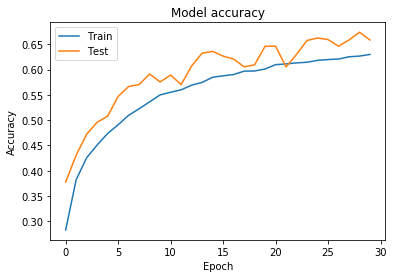

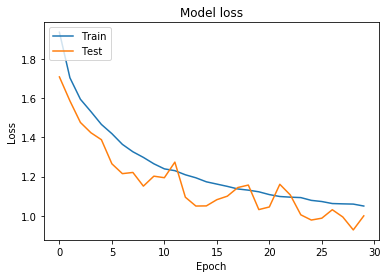

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score & auc

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 132us/step
Test loss: 1.0015002754211426
Test accuracy: 0.6554


In [19]:
def class_names():
    return ['airplane', 'automobile', 'bird', 'cat', 
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classes = class_names()

In [20]:
y_pred = model.predict(x_test)  # predictions 

In [21]:
for i, label in enumerate(classes):
    which_label = label
    true_labels  = y_test[:, i]
    pred_labels  = y_pred[:, i]
    
    fpr, tpr, thresholds = roc_curve(y_true  = true_labels,
                                                     y_score = pred_labels,
                                                     pos_label = 1)
    auc_score = auc(fpr, tpr)
    
    print("AUC for {} : {}".format(which_label, auc_score))

AUC for airplane : 0.961484
AUC for automobile : 0.9821748888888888
AUC for bird : 0.9027551111111111
AUC for cat : 0.8931178333333333
AUC for deer : 0.9344149999999998
AUC for dog : 0.9246406666666667
AUC for frog : 0.9674836666666666
AUC for horse : 0.9552190000000002
AUC for ship : 0.9777482222222222
AUC for truck : 0.9704458888888889
